<a href="https://colab.research.google.com/github/SousamarcoDSC568/-DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db)

# Explore data

In [236]:
#View top 5 rows
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [239]:
# Question: Display the number of unique values in each (for each) column.
uniqueValues = df.nunique()
uniqueValues

date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [241]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards

specificDF = df[(df['county'] == 'Bristol') & (df['state']=='Massachusetts')]
Bristol_fips = specificDF['fips'].unique()[0]

specificDF = df[(df['county'] == 'Suffolk') & (df['state']=='Massachusetts')]
Suffolk_fips = specificDF['fips'].unique()[0]

print('Bristol_fips = ', Bristol_fips)
print('Suffolk_fips = ', Suffolk_fips)

Bristol_fips =  25005.0
Suffolk_fips =  25025.0


In [242]:
#I filter a given dataframe by a given fips value. I then set the date as the index and drop the fips column.

def get_county_stat(data,fips_value):
  output = data[data['fips'] == fips_value]
  output = output.set_index('date')
  output = output.drop('fips',axis =1)

  return output

get_county_stat(df,Bristol_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [243]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

In [244]:
df_Bristol.index = pd.to_datetime(df_Bristol.index)
df_Bristol

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0
...,...,...,...,...
2020-09-06,Bristol,Massachusetts,9365,664
2020-09-07,Bristol,Massachusetts,9393,667
2020-09-08,Bristol,Massachusetts,9409,668


In [245]:
df_Suffolk.index = pd.to_datetime(df_Suffolk.index)
df_Suffolk

,county,state,cases,deaths
date,,,,
2020-02-01,Suffolk,Massachusetts,1,0
2020-02-02,Suffolk,Massachusetts,1,0
2020-02-03,Suffolk,Massachusetts,1,0
2020-02-04,Suffolk,Massachusetts,1,0
2020-02-05,Suffolk,Massachusetts,1,0
...,...,...,...,...
2020-09-06,Suffolk,Massachusetts,22697,1110
2020-09-07,Suffolk,Massachusetts,22756,1111
2020-09-08,Suffolk,Massachusetts,22788,1111


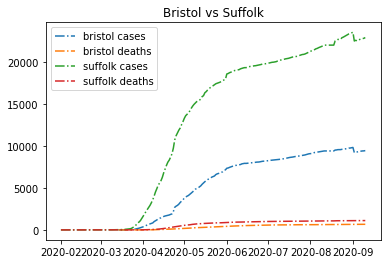

In [246]:

plt.plot(df_Bristol.index, df_Bristol.cases, '-.',label = 'bristol cases')
plt.plot(df_Bristol.index, df_Bristol.deaths, '-.',label = 'bristol deaths')
plt.plot(df_Suffolk.index, df_Suffolk.cases, '-.',label = 'suffolk cases')
plt.plot(df_Suffolk.index, df_Suffolk.deaths, '-.',label = 'suffolk deaths')
plt.title('Bristol vs Suffolk')
plt.legend()


### I had some trouble with the bar plot. The following is junk I tried. ###

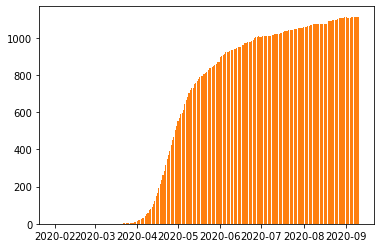

In [169]:

p1 = plt.bar(df_Bristol.index, df_Bristol.deaths)
p2 = plt.bar(df_Suffolk.index, df_Suffolk.deaths)

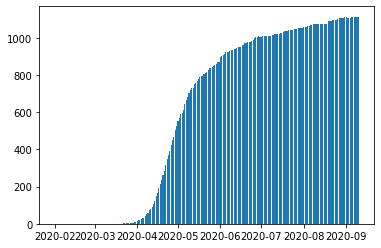

In [155]:
p2 = plt.bar(df_Suffolk.index, df_Suffolk.deaths)

In [176]:
df4 = df.set_index('date')
df4.index = pd.to_datetime(df4.index)
df4

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...
2020-09-10,Sweetwater,Wyoming,56037.0,319,2
2020-09-10,Teton,Wyoming,56039.0,453,1
2020-09-10,Uinta,Wyoming,56041.0,310,2


In [175]:
#ax = df4.plot(kind='bar', y=df.deaths, x=df_Suffolk.index,bottom=df_Bristol.deaths, stacked=True)

df4.plot(kind='bar', x=df4.index, y=df4.deaths, color='red')

KeyError: ignored

In [165]:
ax = df_Suffolk.plot(kind='bar', y=df.deaths, x=df.date)

KeyError: ignored

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,6))
#bottom part command


SyntaxError: ignored

## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [257]:
#Cases. I take the most recent date. I think these are cumulative?

df2 = df[df.date == '2020-09-10']
df2  = df2.set_index(['county','date'])
df2.sort_values('cases',ascending=False).head(10)

,,state,fips,cases,deaths
county,date,,,,
Los Angeles,2020-09-10,California,6037.0,251024,6128
New York City,2020-09-10,New York,NaN,241686,23741
Miami-Dade,2020-09-10,Florida,12086.0,162893,2789
Maricopa,2020-09-10,Arizona,4013.0,136571,3133
Cook,2020-09-10,Illinois,17031.0,132966,5103
Harris,2020-09-10,Texas,48201.0,113504,2363
Dallas,2020-09-10,Texas,48113.0,77948,1021
Broward,2020-09-10,Florida,12011.0,73869,1258
Clark,2020-09-10,Nevada,32003.0,61871,1240


In [256]:
#Deaths.

df2 = df[df.date == '2020-09-10']
df2  = df2.set_index(['county','date'])
df2.sort_values('deaths',ascending=False).head(10)

,,state,fips,cases,deaths
county,date,,,,
New York City,2020-09-10,New York,NaN,241686,23741
Los Angeles,2020-09-10,California,6037.0,251024,6128
Cook,2020-09-10,Illinois,17031.0,132966,5103
Maricopa,2020-09-10,Arizona,4013.0,136571,3133
Wayne,2020-09-10,Michigan,26163.0,32877,2941
Miami-Dade,2020-09-10,Florida,12086.0,162893,2789
Harris,2020-09-10,Texas,48201.0,113504,2363
Nassau,2020-09-10,New York,36059.0,45445,2199
Essex,2020-09-10,New Jersey,34013.0,20820,2121


## Death rate Per FIPS 

In [258]:
df3 = df
df3['ratePerFIPS'] = df3['deaths']/df3['fips']
df3.sort_values('ratePerFIPS',ascending=False,inplace=False).head(10)

,date,county,state,fips,cases,deaths,ratePerFIPS
518500,2020-09-10,Los Angeles,California,6037.0,251024,6128,1.015074
515265,2020-09-09,Los Angeles,California,6037.0,249859,6090,1.008779
512032,2020-09-08,Los Angeles,California,6037.0,249241,6036,0.999834
508799,2020-09-07,Los Angeles,California,6037.0,248821,6030,0.998840
505567,2020-09-06,Los Angeles,California,6037.0,248334,6005,0.994699
502333,2020-09-05,Los Angeles,California,6037.0,247542,6000,0.993871
499099,2020-09-04,Los Angeles,California,6037.0,246407,5977,0.990061
495866,2020-09-03,Los Angeles,California,6037.0,244999,5932,0.982607
492632,2020-09-02,Los Angeles,California,6037.0,243935,5878,0.973662
489399,2020-09-01,Los Angeles,California,6037.0,242521,5829,0.965546


## <font color = red> Bonus Point</font>

### Displaying bristol vs Suffolk and Deaths comparison as line and stacked bar charts using altair


In [259]:
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

There are better ways of doing this, but I was lazy. I had to filter. Note that altair doesn't read index.

In [215]:
df_filtered = df[((df['county'] == 'Bristol') & (df['state'] == 'Massachusetts') ) | ( (df['county'] == 'Suffolk') & (df['state'] == 'Massachusetts') )]
df_filtered

,date,county,state,fips,cases,deaths
44,2020-02-01,Suffolk,Massachusetts,25025.0,1,0
52,2020-02-02,Suffolk,Massachusetts,25025.0,1,0
60,2020-02-03,Suffolk,Massachusetts,25025.0,1,0
68,2020-02-04,Suffolk,Massachusetts,25025.0,1,0
76,2020-02-05,Suffolk,Massachusetts,25025.0,1,0
...,...,...,...,...,...,...
513064,2020-09-08,Suffolk,Massachusetts,25025.0,22788,1111
516288,2020-09-09,Bristol,Massachusetts,25005.0,9418,668
516298,2020-09-09,Suffolk,Massachusetts,25025.0,22831,1111
519523,2020-09-10,Bristol,Massachusetts,25005.0,9448,670


In [224]:


from altair import datum

alt.Chart(df_filtered).mark_bar().encode(
    x='date:O',
    y='deaths:Q',
    color = 'county',
    tooltip=['deaths']
).transform_filter(
    datum.date >'2020-04-06'
).interactive()

alt.Chart(...)

In [227]:

#I looked into plotting 'multiple columns' (deaths and cases) on the same axis. Jake responded that while it is not impossible (can use procedures like melting, or layering graphs), it is not the natural way to use altair
#We discuss the particulars of Altair's data format here: https://altair-viz.github.io/user_guide/data.html?highlight=wide#long-form-vs-wide-form-data
#jakevdp: In short, the only way to plot multiple columns on the same chart is to use layers, as you have found.


alt.Chart(df_filtered).mark_line().encode(
    x='month(date):O',
    y='deaths:Q',
    color='county',
)




alt.Chart(...)

In [232]:
alt.Chart(df_filtered).mark_line().encode(
    x='date:O',
    y='deaths:Q',
    color='county',
    tooltip=['deaths']
).transform_filter(
    datum.date >'2020-04-06'
).interactive()

alt.Chart(...)

In [233]:
alt.Chart(df_filtered).mark_line().encode(
    x='date:O',
    y='cases:Q',
    color='county',
    tooltip=['deaths']
).transform_filter(
    datum.date >'2020-04-06'
).interactive()

alt.Chart(...)